# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import re 
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('cyberbullying_tweets.csv')
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# Clean Data

In [3]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word in string.ascii_letters or word in string.whitespace])
    tokens = re.split('\W+', text)
    text = " ".join(ps.stem(word) for word in tokens if word not in stopwords)
    return text

In [4]:
data['cleaned_text'] = data['tweet_text'].apply(lambda x: clean_text(x))
data.head()

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkk classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jasongio meh p thank head concern anoth angri ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isi account pretend kurdish acco...


# TF-IDF

In [5]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(data['cleaned_text'])

print(X_tfidf.shape)

(47692, 53299)


In [6]:
print(tfidf_vect.get_feature_names_out()[-100:-1])

['zhha' 'zhiyong' 'zhomb' 'zhorah' 'ziallrh' 'zibaladi' 'zidanomajid'
 'zigi' 'zika' 'zillion' 'zillionair' 'zillytbh' 'zilrc' 'ziltch' 'zim'
 'zimbabw' 'zimmer' 'zimmerman' 'zimmermantri' 'zina' 'zine' 'zing' 'zion'
 'zionhorst' 'zionism' 'zionist' 'zionistika' 'zionit' 'ziorim' 'zip'
 'ziper' 'zipper' 'zippi' 'ziya' 'ziyon' 'zizou' 'zkotek' 'zlatandrinkin'
 'zmartinx' 'zmgitshutch' 'zne' 'zneoni' 'zoada' 'zoar' 'zoastrian' 'zoe'
 'zoebeastt' 'zoegclifford' 'zoeharri' 'zoellasmil' 'zoenitanna' 'zoey'
 'zombando' 'zombi' 'zombiebisqu' 'zombiecatmeow' 'zombieneith' 'zomg'
 'zone' 'zong' 'zonk' 'zoo' 'zoobear' 'zoom' 'zoomer' 'zooo' 'zorat'
 'zorazzora' 'zothechosenon' 'zouden' 'zoutliquoric' 'zram' 'zsteven'
 'zstoneciph' 'zt' 'ztddupui' 'ztraight' 'ztupidd' 'zucchini' 'zuckerberg'
 'zuckercorn' 'zuko' 'zulfiqar' 'zulfiqarsheikh' 'zulun' 'zumbi' 'zuppa'
 'zusterschap' 'zuzeabel' 'zvakaoma' 'zvlaho' 'zyampii' 'zydrizz' 'zyeth'
 'zynga' 'zython' 'zzoegrimm' 'zzz' 'zzzz']


In [7]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names_out()
X_tfidf_df

,aa,aaa,aaaa,aaaaa,aaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaah,aaaaaaaaaah,aaaaaaaaaajajajajajajajahahahajahaja,aaaaaaaahhhhhhh,aaaaah,...,zvlaho,zyampii,zydrizz,zyeth,zynga,zython,zzoegrimm,zzz,zzzz,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Gradient Boosting and Random Forest

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['cyberbullying_type'], test_size=0.05, train_size=0.25)

In [9]:
tfidf_vect = TfidfVectorizer(dtype=np.float32)
tfidf_vect_fit = tfidf_vect.fit(X_train)

In [10]:
tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

In [11]:
X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

In [12]:
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,21238,21239,21240,21241,21242,21243,21244,21245,21246,21247
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Random Forest

In [13]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)
y_pred_rf = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred_rf, average='macro')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round((y_pred_rf==y_test).sum() / len(y_pred_rf), 3 )))

Precision: 0.829 / Recall: 0.823 / Accuracy: 0.815


## Gradient Boosting

gb = GradientBoostingClassifier(n_estimators=50, max_depth=3)

gb_model = gb.fit(X_train_vect, y_train)
y_pred_gb = gb_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred_gb,  average='macro')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round((y_pred_gb==y_test).sum() / len(y_pred_gb), 3 )))

print('Random Forest Mistakes: {} \nGradient Boosting Mistakes: {}'.format((y_pred_rf!=y_test).sum(), (y_pred_gb!=y_test).sum()))

In [14]:
pd.set_option('display.max_colwidth', 100)
rf_df = pd.DataFrame([X_test, y_test]).transpose()
rf_df['pred'] = y_pred_rf
rf_df[rf_df['pred'] != rf_df['cyberbullying_type']]

,cleaned_text,cyberbullying_type,pred
27,gcaroth eek cant stand split keyboard doesnt work well mmo,not_cyberbullying,other_cyberbullying
2385,stomach ach,not_cyberbullying,other_cyberbullying
6071,specgram wonder wouldv made ofglass eye amp socksmitten made synthet fibr wouldv blown dualamb mind,not_cyberbullying,other_cyberbullying
46715,neekroh pictur creep fuck coon xd,ethnicity,other_cyberbullying
31570,baseballswagg tk bulli,other_cyberbullying,not_cyberbullying
...,...,...,...
3865,import thing parent teach children walk someon els shoe httptcoxwqvstnr,not_cyberbullying,other_cyberbullying
2504,dsmyx politibunni mani follow know precis happen,not_cyberbullying,other_cyberbullying
30267,murdoch never take feminazi guru cwknew feminazi godmoth helensaxbi nennabaston audios yasnecati,other_cyberbullying,gender
24833,rickeysmiley go tami bull meeka lmaooooo,other_cyberbullying,not_cyberbullying


In [15]:
cyberbullying_types = rf_df['cyberbullying_type'].unique()
cyberbullying_types

array(['not_cyberbullying', 'ethnicity', 'gender', 'age', 'religion',
       'other_cyberbullying'], dtype=object)

<Axes: xlabel='cyberbullying_type', ylabel='count'>

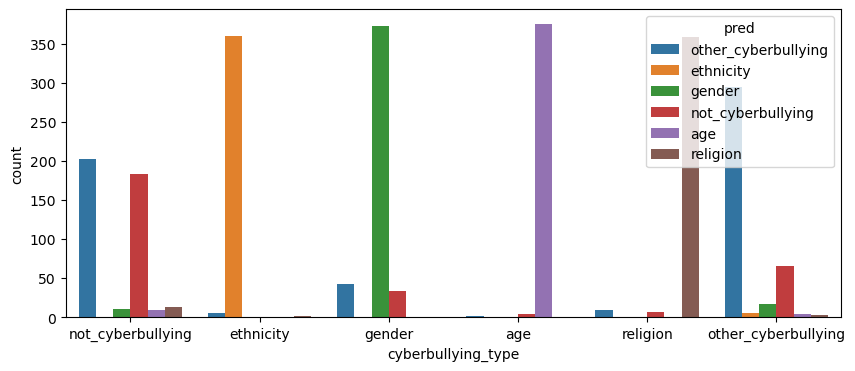

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=rf_df, x='cyberbullying_type', hue='pred')

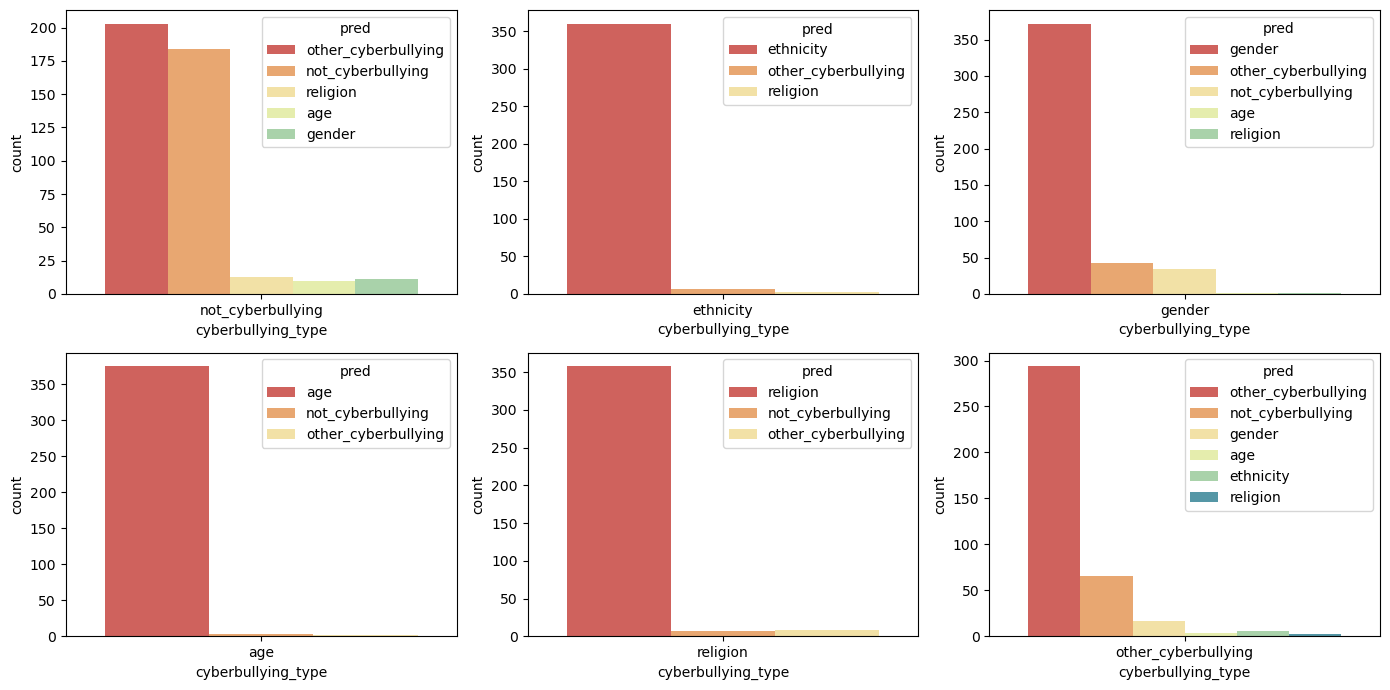

In [29]:
import math

sns.set_palette('Spectral')
dim = math.ceil(len(cyberbullying_types) / 3)

fig, ax = plt.subplots(dim, 3, figsize=(14, 7))
i = 0
for type in cyberbullying_types:
    sns.countplot(x='cyberbullying_type', data=rf_df[rf_df['cyberbullying_type'] == type], ax=ax[int(i / 3), int(i % 3)], hue='pred')
    #ax[int(i / 3), int(i % 3)].legend(loc=(1.05, 0.5))
    i = i + 1

plt.tight_layout()
plt.show()